### Implemntation of Convolutional Neural Network (CNN) to predict the numbers from hand written images.

In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

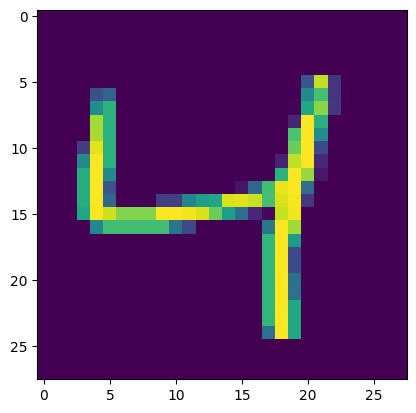

In [5]:
plt.imshow(x_train[2])

In [6]:
print(y_train[2])

4


9


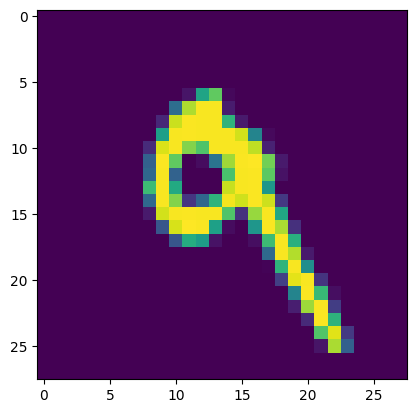

In [7]:
plt.imshow(x_test[7])
print(y_test[7])

In [8]:
x_train = x_train.reshape(60000,28,28,1)

In [9]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [10]:
x_test = x_test.reshape(10000,28,28,1)

In [11]:
y_train[0]

5

In [12]:
y_train = to_categorical(y_train)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_test = to_categorical(y_test)

In [15]:
cnnmodel=Sequential()

In [16]:
from keras.layers.convolutional.base_conv import Conv
cnnmodel.add(Conv2D(64,kernel_size=3,activation="relu",input_shape=(28,28,1)))
cnnmodel.add(Conv2D(32,kernel_size=3,activation="relu"))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(10,activation="softmax"))

In [17]:
cnnmodel.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [18]:
cnnmodel.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 136s 72ms/step - loss: 0.1950 - accuracy: 0.9566 - val_loss: 0.0854 - val_accuracy: 0.9747
Epoch 2/3
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0579 - accuracy: 0.9827 - val_loss: 0.0939 - val_accuracy: 0.9721
Epoch 3/3
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0835 - val_accuracy: 0.9770


In [19]:
print(cnnmodel.predict(x_test[:3]))

1/1 [==============================] - 0s 81ms/step
[[3.3811475e-07 1.4681907e-10 2.3159469e-06 5.9849169e-04 8.9981807e-11
  1.6599735e-09 1.7282238e-13 9.9939823e-01 1.2322131e-07 4.4051311e-07]
 [7.3765077e-06 1.5325232e-07 9.9998951e-01 2.3580783e-06 9.8631639e-13
  3.0527509e-13 5.4421758e-07 5.6218535e-10 6.6557764e-09 2.5531049e-15]
 [4.3077785e-06 9.9955851e-01 2.7041742e-06 9.8489579e-08 2.6264577e-04
  6.3194071e-05 2.2897329e-05 2.0931780e-06 8.3385632e-05 2.8409627e-07]]


In [20]:
print(y_test[:3])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
